<a href="https://www.kaggle.com/code/akshitasana/bigmart-sales-prediction?scriptVersionId=120184037" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bigmart-sales-data/Train.csv
/kaggle/input/bigmart-sales-data/Test.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score

In [4]:
data_train=pd.read_csv('/kaggle/input/bigmart-sales-data/Train.csv')

In [5]:
print(data_train.shape)

(8523, 12)


In [6]:
data_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
data_train.drop(columns=['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],inplace=True)

In [9]:
data_train.sample(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3567,15.500,Regular,0.101336,Fruits and Vegetables,196.5768,NaN,Tier 2,Supermarket Type1,3350.3056
473,15.150,Regular,0.012282,Snack Foods,132.5284,Medium,Tier 1,Supermarket Type1,1713.7692
4575,13.600,Regular,0.049580,Frozen Foods,110.0912,Small,Tier 2,Supermarket Type1,1965.4416
6294,7.825,Low Fat,0.079614,Meat,65.0826,Small,Tier 2,Supermarket Type1,1162.4868
8252,10.500,Regular,0.010999,Snack Foods,164.3842,Medium,Tier 1,Supermarket Type1,1823.6262


In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           7060 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           6113 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), object(5)
memory usage: 599.4+ KB


In [11]:
data_train.isnull().sum()

Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
dtype: int64

In [12]:
data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


<AxesSubplot:>

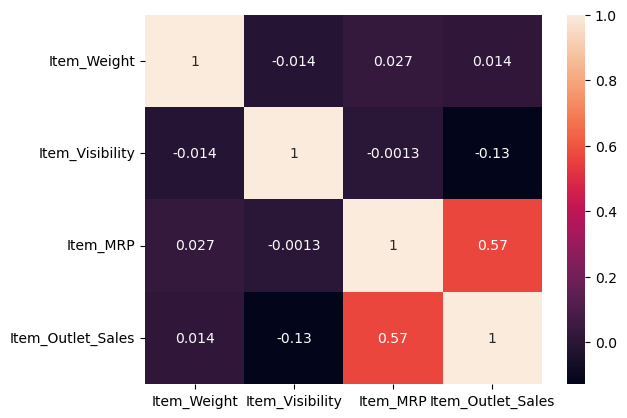

In [13]:
sns.heatmap(data_train.corr(),annot=True)

# **FILLING NAN VALUES**

In [14]:
data_train['Item_Weight'].fillna(data_train['Item_Weight'].mean(),inplace=True)
data_train['Outlet_Size'].fillna(data_train['Outlet_Size'].mode()[0],inplace=True)

In [15]:
data_train.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

# *HANDLING NUMERIC DATA*

In [16]:
num_cols=[col for col in data_train.columns if data_train[col].dtype in ['int64', 'float64']]

In [17]:
num_cols

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

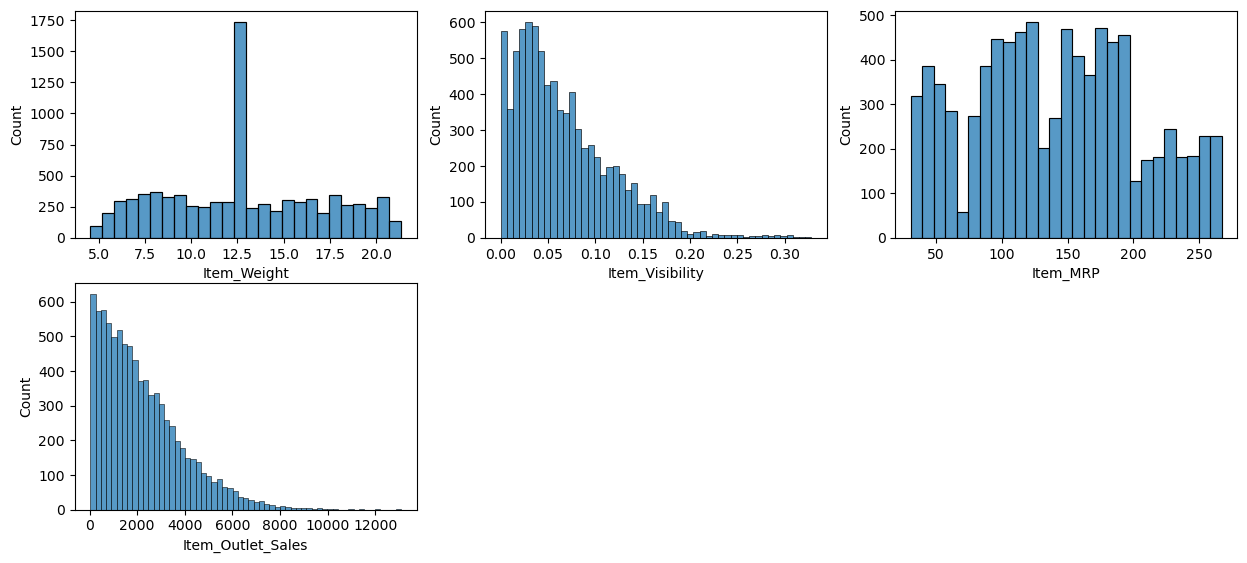

In [18]:
plt.figure(figsize=(15,10))
for i in enumerate(num_cols):
    plt.subplot(3,3,i[0]+1)
    sns.histplot(data_train[i[1]])

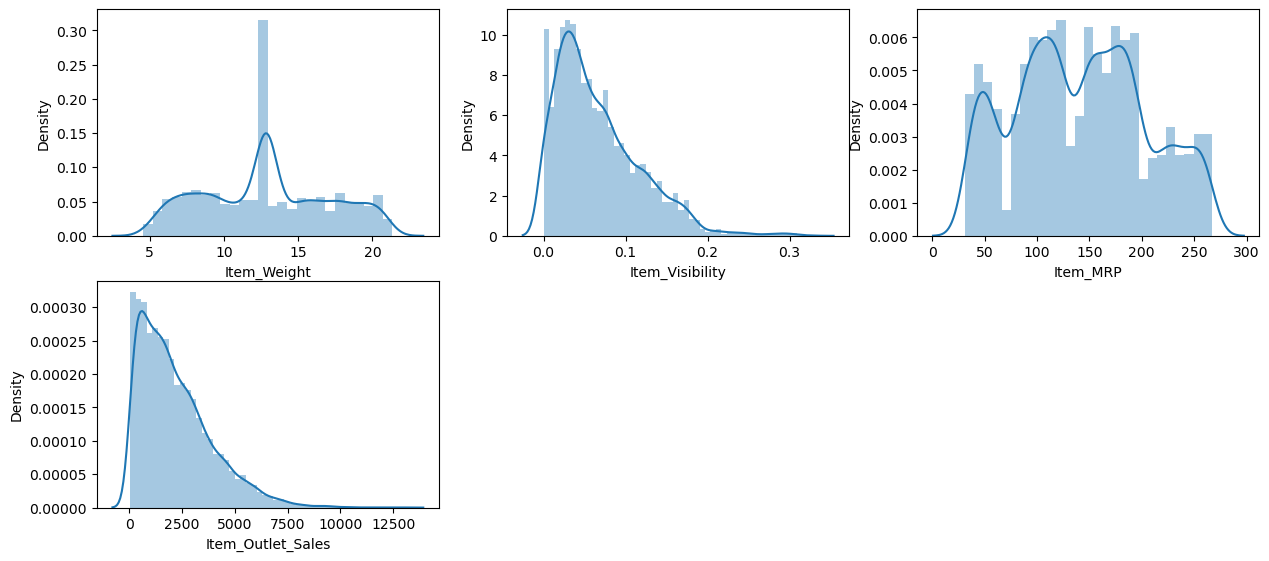

In [19]:
plt.figure(figsize=(15,10))
for i in enumerate(num_cols):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(data_train[i[1]])

In [20]:
data_train['Item_Visibility']=np.sqrt(data_train['Item_Visibility'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

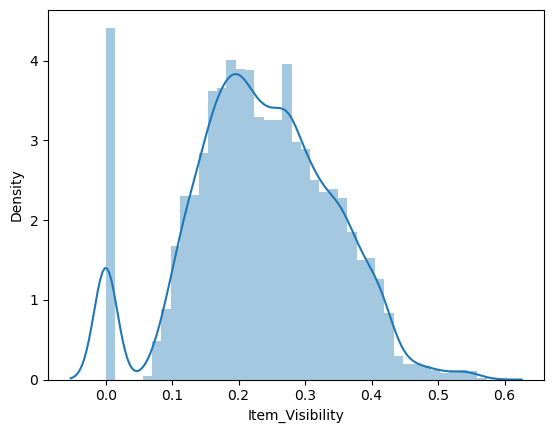

In [21]:
sns.distplot(data_train['Item_Visibility'])

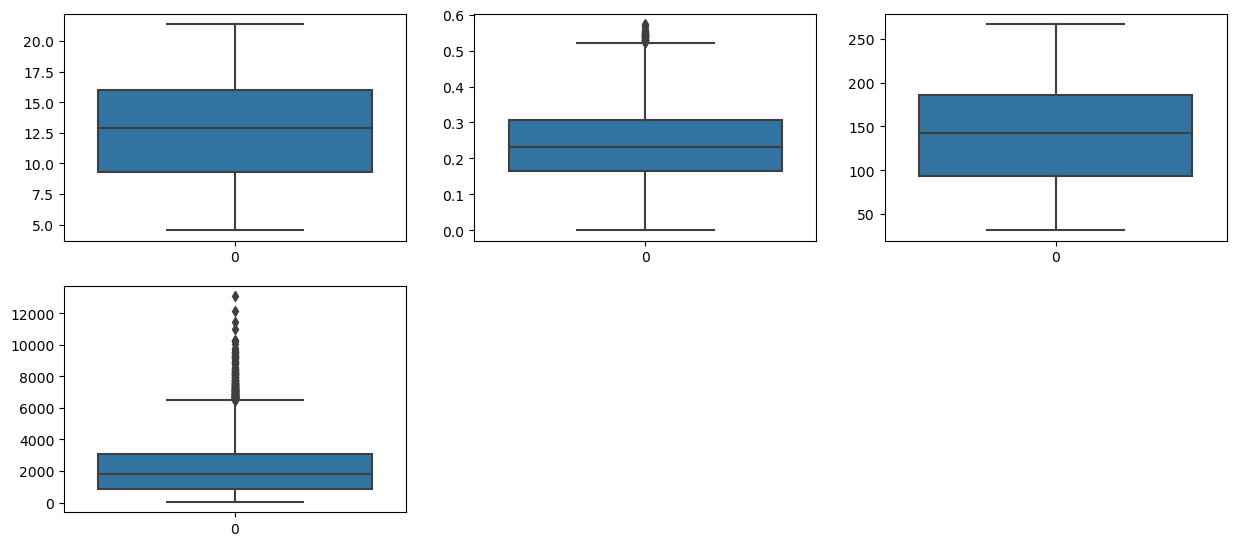

In [22]:
plt.figure(figsize=(15,10))
for i in enumerate(num_cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data_train[i[1]])

In [23]:
def remove_outlier(df,col_name):
    Q1=df[col_name].quantile(0.25)
    Q3=df[col_name].quantile(0.75)
    IQR=Q3-Q1
    df_out=df.loc[(df[col_name]>Q1-1.5*IQR)&(df[col_name]<Q3+1.5*IQR)]
    return df_out

In [24]:
data_train=remove_outlier(data_train,'Item_Visibility')

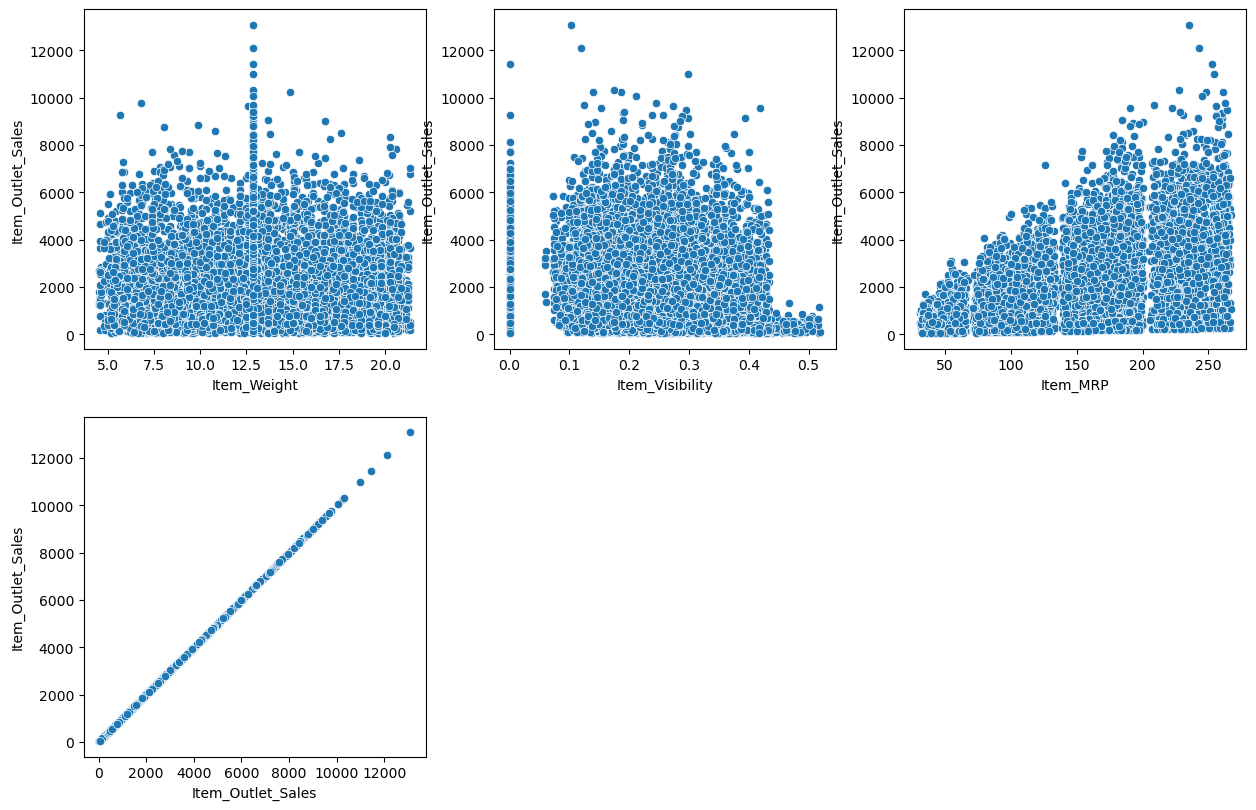

In [25]:
plt.figure(figsize=(15,15))
for i in enumerate(num_cols):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(data=data_train,x=i[1],y='Item_Outlet_Sales')

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_MRP'>

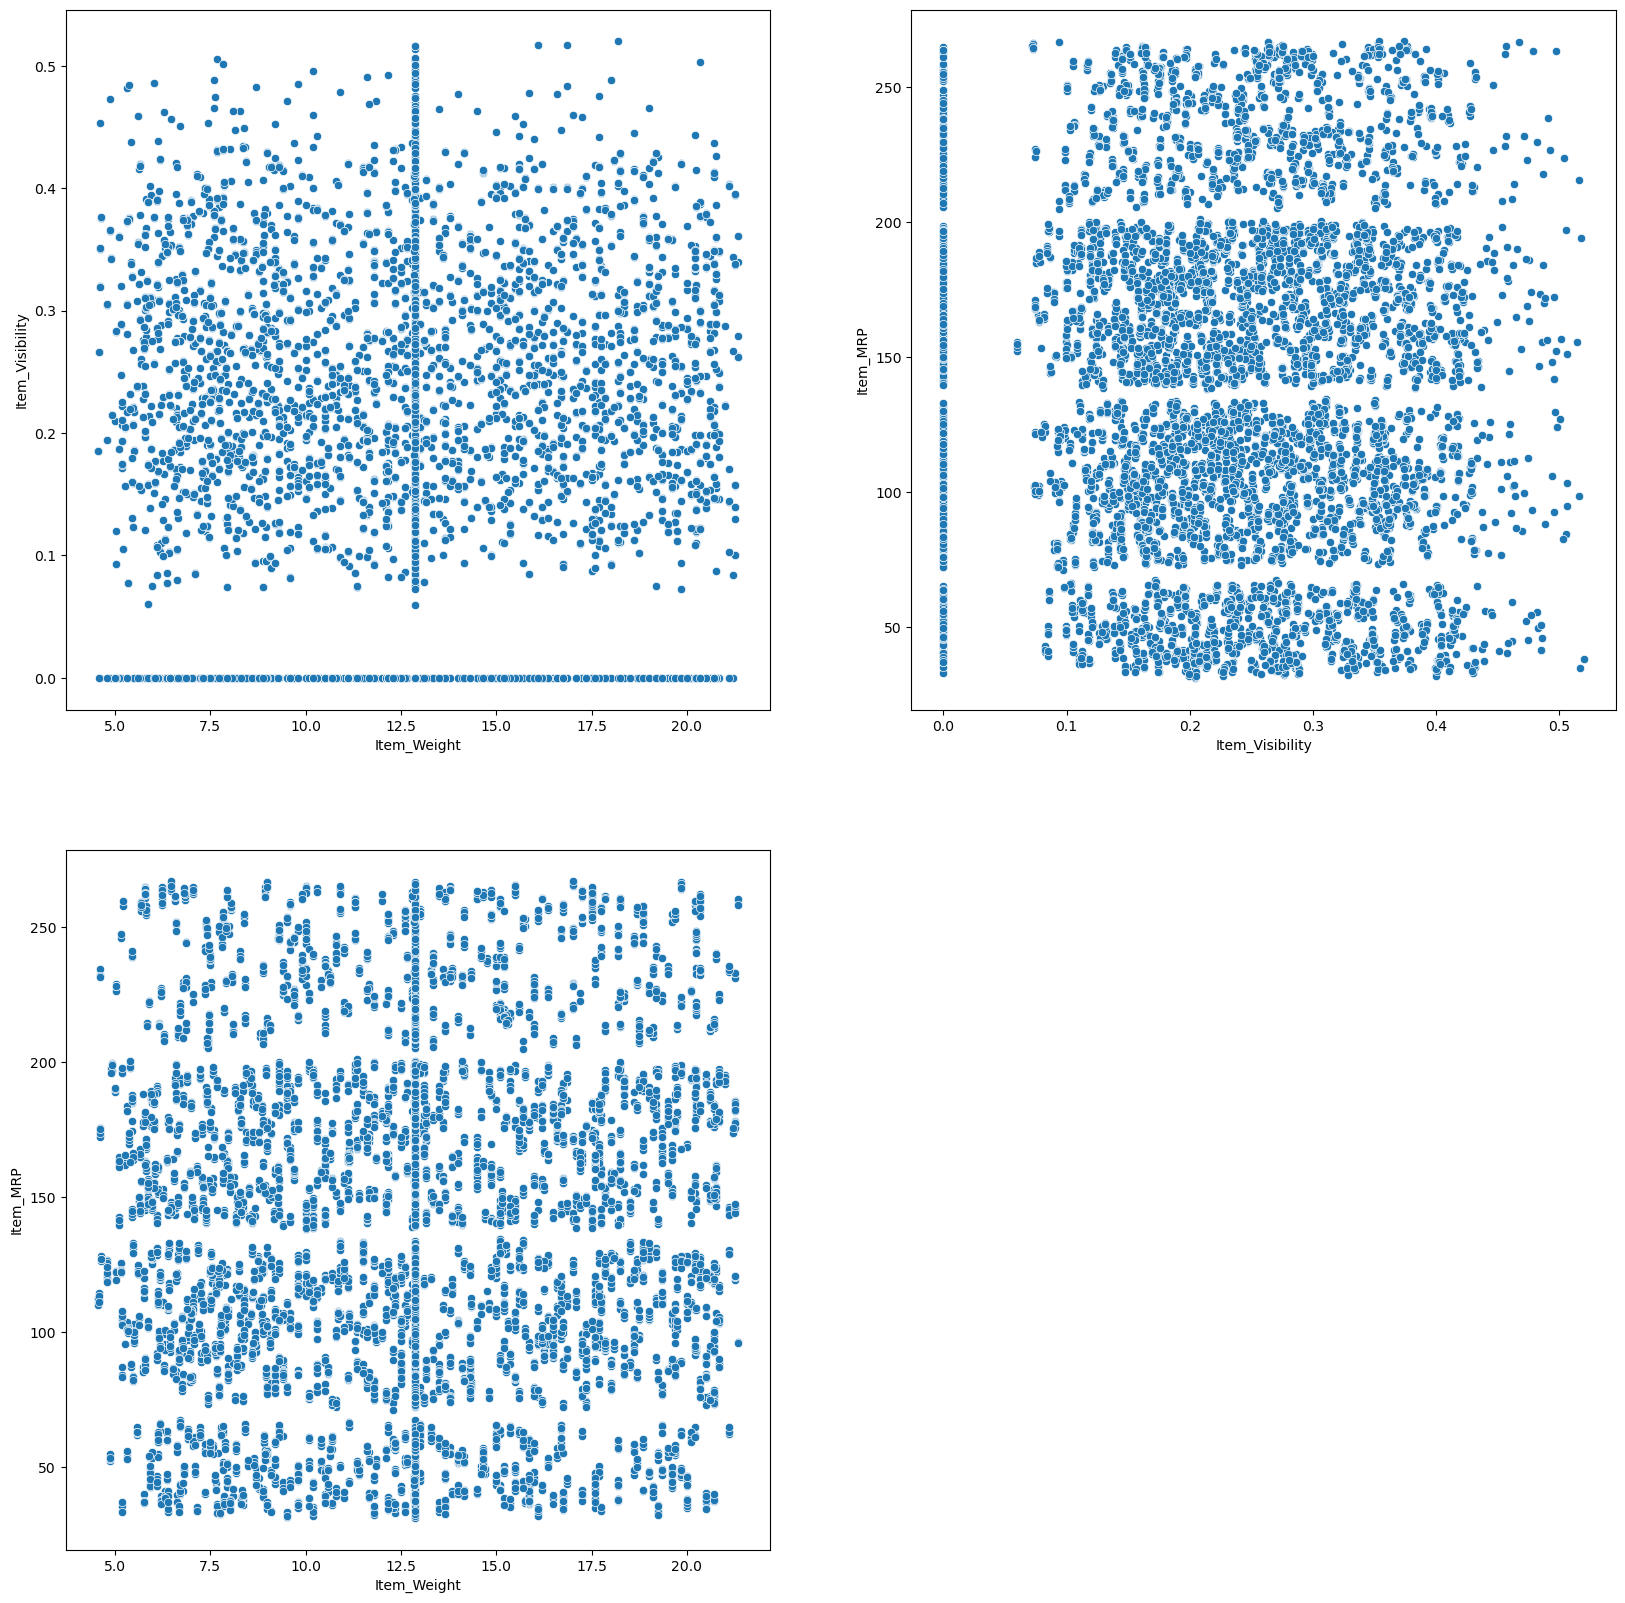

In [26]:
plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
sns.scatterplot(data=data_train,x='Item_Weight',y='Item_Visibility')
plt.subplot(2,2,2)
sns.scatterplot(data=data_train,x='Item_Visibility',y='Item_MRP')
plt.subplot(2,2,3)
sns.scatterplot(data=data_train,x='Item_Weight',y='Item_MRP')

# *HANDLING CATEGORICAL DATA*

In [27]:
cat_cols=[col for col in data_train.columns if data_train[col].dtype=='object']

In [28]:
cat_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

Item_Fat_Content 
 Low Fat    5070
Regular    2877
LF          309
reg         117
low fat     110
Name: Item_Fat_Content, dtype: int64
Item_Type 
 Fruits and Vegetables    1223
Snack Foods              1195
Household                 903
Frozen Foods              854
Dairy                     679
Canned                    647
Baking Goods              644
Health and Hygiene        520
Soft Drinks               442
Meat                      423
Breads                    250
Hard Drinks               213
Others                    169
Starchy Foods             148
Breakfast                 109
Seafood                    64
Name: Item_Type, dtype: int64
Outlet_Size 
 Medium    5187
Small     2364
High       932
Name: Outlet_Size, dtype: int64
Outlet_Location_Type 
 Tier 3    3334
Tier 2    2785
Tier 1    2364
Name: Outlet_Location_Type, dtype: int64
Outlet_Type 
 Supermarket Type1    5577
Grocery Store        1043
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype

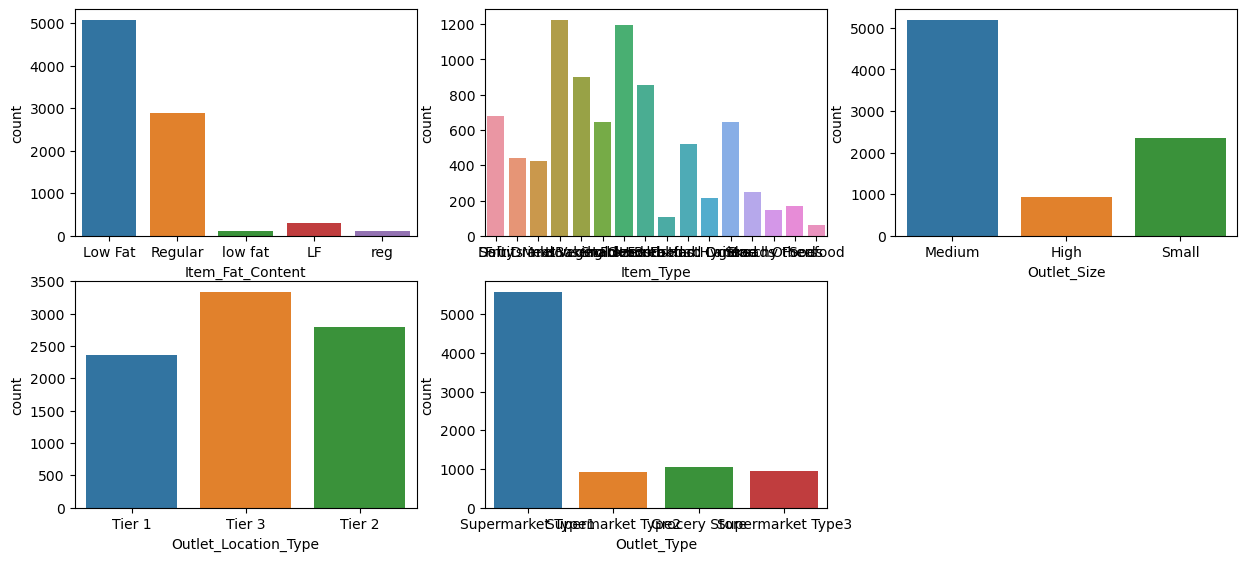

In [29]:
plt.figure(figsize=(15,10))
for i in enumerate(cat_cols):
    plt.subplot(3,3,i[0]+1)
    sns.countplot(data=data_train,x=i[1])
    print(cat_cols[i[0]],"\n",data_train[i[1]].value_counts())

In [30]:
data_train['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)

In [31]:
data_train['Item_Fat_Content'].value_counts()

Low Fat    5489
Regular    2994
Name: Item_Fat_Content, dtype: int64

In [32]:
data_train.sample(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3454,20.7,Low Fat,0.411907,Canned,183.5266,High,Tier 3,Supermarket Type1,4426.2384
7089,20.7,Low Fat,0.221438,Fruits and Vegetables,39.9506,Medium,Tier 2,Supermarket Type1,872.8638
5832,12.3,Low Fat,0.191287,Frozen Foods,193.3162,Medium,Tier 3,Grocery Store,192.4162
7683,16.7,Regular,0.206604,Dairy,120.7782,Medium,Tier 1,Supermarket Type1,1072.6038
2343,15.6,Low Fat,0.297012,Snack Foods,220.1798,Medium,Tier 2,Supermarket Type1,5068.7354


In [33]:
label_encoder=LabelEncoder()

In [34]:
data_train['Item_Type'] = label_encoder.fit_transform(data_train['Item_Type'])
data_train['Outlet_Type'] = label_encoder.fit_transform(data_train['Outlet_Type'])
data_train['Outlet_Location_Type'] = label_encoder.fit_transform(data_train['Outlet_Location_Type'])
data_train['Outlet_Size'] = label_encoder.fit_transform(data_train['Outlet_Size'])
data_train['Item_Fat_Content'] = label_encoder.fit_transform(data_train['Item_Fat_Content'])
# data_train=pd.get_dummies(data=data_train,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type'],drop_first=True)

In [35]:
data_train.sample(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4964,12.857645,1,0.140846,5,128.1310,1,2,3,1687.8030
7643,15.350000,1,0.337162,6,189.7504,1,2,2,2492.7552
4396,10.895000,0,0.370632,4,264.3568,1,2,2,4745.8224
4953,20.750000,0,0.145887,14,153.5024,1,0,1,2428.8384
4811,19.700000,1,0.134392,10,102.5990,1,1,1,2063.9800


# *SPLITTING THE DATA*

In [36]:
x=data_train.drop(columns='Item_Outlet_Sales')
y=data_train['Item_Outlet_Sales']

In [37]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,0.126678,4,249.8092,1,0,1
1,5.920,1,0.138846,14,48.2692,1,2,2
2,17.500,0,0.129461,10,141.6180,1,0,1
3,19.200,1,0.000000,6,182.0950,1,2,0
4,8.930,0,0.000000,9,53.8614,0,2,1
...,...,...,...,...,...,...,...,...
8518,6.865,0,0.238293,13,214.5218,0,2,1
8519,8.380,1,0.216754,0,108.1570,1,1,1
8520,10.600,0,0.187580,8,85.1224,2,1,1
8521,7.210,1,0.381078,13,103.1332,1,2,2


In [38]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8483, dtype: float64

In [39]:
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.3,shuffle=True)

In [40]:
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(5938, 8)
(2545, 8)
(5938,)
(2545,)


In [41]:
x_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
4532,15.850000,1,0.084528,13,41.0480,2,1,1
8413,13.150000,0,0.143917,1,82.7566,2,1,1
5946,12.857645,1,0.485654,13,46.1402,2,0,0
3619,11.850000,1,0.224429,6,163.8526,1,1,1
3680,18.850000,0,0.190373,10,57.3562,1,1,1
...,...,...,...,...,...,...,...,...
3738,14.000000,1,0.194254,5,166.4526,1,1,1
4097,17.100000,0,0.358316,6,111.9886,2,1,1
2954,17.350000,0,0.121159,5,73.6038,0,2,1
5372,14.800000,0,0.368304,10,190.8846,1,2,0


In [42]:
x_valid

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
5016,11.000000,1,0.364739,3,222.0798,0,2,1
5935,12.857645,1,0.280640,6,116.3808,2,0,0
4193,12.857645,0,0.280338,14,113.2860,1,2,3
5713,12.857645,0,0.220976,13,113.1176,1,2,3
2107,13.150000,0,0.191420,5,180.7976,0,2,1
...,...,...,...,...,...,...,...,...
7885,10.000000,0,0.277047,5,141.6180,1,2,0
3332,15.700000,1,0.166522,3,169.3790,1,2,2
962,12.150000,0,0.255003,11,253.7040,1,1,1
8276,8.575000,0,0.154551,14,106.6280,2,0,1


# *SCALING*

In [44]:
scaler=StandardScaler()

# *MODELS*

In [45]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,SGDRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [46]:
LR= LinearRegression()
RG=Ridge()
LS=Lasso()
SGD=SGDRegressor()
SVR=svm.SVR()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor()
XGB=XGBRegressor()

In [47]:
models=[LR,RG,LS,SGD,SVR,DTR,RFR,XGB]

In [48]:
def predictions(model,x_train,y_train,x_test,y_test):
    x_train=scaler.fit_transform(x_train)
    x_test=scaler.transform(x_test)
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    print("R2SCORE_TRAIN:-",r2_score(y_train,y_pred_train))
    print("R2SCORE_VALID:-",r2_score(y_test,y_pred_test))
    print("MEAN ABSOLUTE SCORE:-",mean_absolute_error(y_test,y_pred_test))
    print("MEAN_SQUARED_ERROR:-",np.sqrt(mean_squared_error(y_test,y_pred_test)))
    print('CROSS_VAL_SCORE:-')
    scores = cross_val_score(model, x, y,cv=5)
    print(scores)
    print('MEAN_SCORE:-', scores.mean())

In [49]:
for model in models:
    print(model,"\n")
    predictions(model,x_train,y_train,x_valid,y_valid)
    print("-------"*43)

LinearRegression() 

R2SCORE_TRAIN:- 0.5111466100516444
R2SCORE_VALID:- 0.49382002306559336
MEAN ABSOLUTE SCORE:- 913.2712344756587
MEAN_SQUARED_ERROR:- 1198.002498097385
CROSS_VAL_SCORE:-
[0.52572116 0.50016774 0.48971429 0.50375861 0.50227987]
MEAN_SCORE:- 0.5043283315966846
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Ridge() 

R2SCORE_TRAIN:- 0.5111465829605795
R2SCORE_VALID:- 0.49382527014161903
MEAN ABSOLUTE SCORE:- 913.2494842140637
MEAN_SQUARED_ERROR:- 1197.9962888173234
CROSS_VAL_SCORE:-
[0.52571539 0.50015491 0.48971099 0.50380155 0.50228085]
MEAN_SCORE:- 0.5043327378570339
--------------------------------------------------------------------------------------------------------------------------------------------------------

# *XGB Regressor*

<BarContainer object of 8 artists>

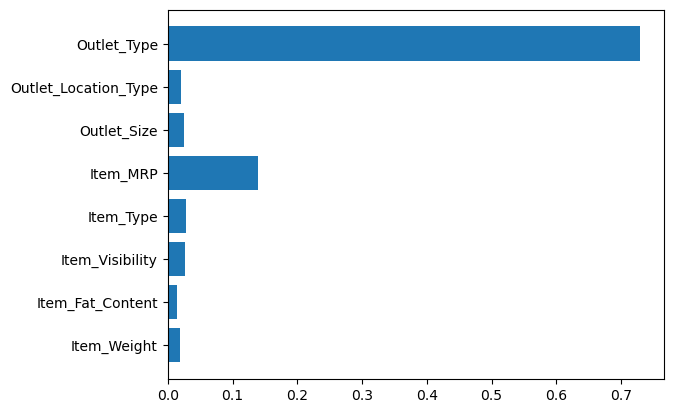

In [50]:
plt.barh(x_train.columns, XGB.feature_importances_)

In [51]:
print(XGB.get_params())

{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 6, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 100, 'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [52]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {
                'n_estimators': [10, 20, 40, 50, 100, 150, 200, 500],
                'max_depth': [3, 5, 7, 9, 11, 15]
               }
xgb =XGB
xgb_model = RandomizedSearchCV(estimator =XGB, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
xgb_model.fit(x_train, y_train.ravel())

Fitting 3 folds for each of 48 candidates, totalling 144 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, m...,
                                          max_delta_step=0, max_depth=6,
                                          max_leaves=0, min_child_weight=1

In [53]:
xgb_model.score(x_train,y_train)

0.6237291525991664

In [54]:
xgb_model.score(x_valid,y_valid)

0.5889831758434083

# *Random Forest Regressor*

<BarContainer object of 8 artists>

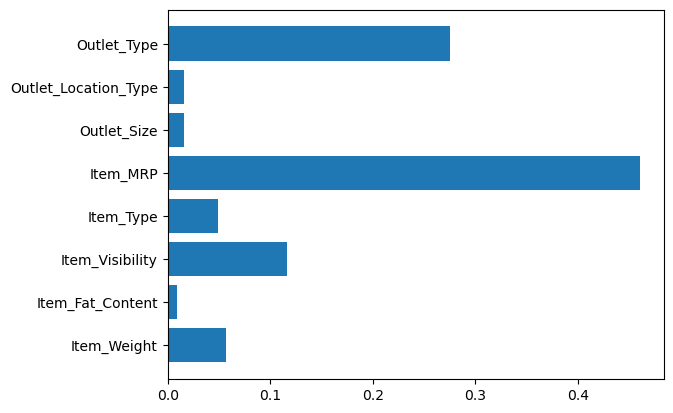

In [55]:
plt.barh(x_train.columns, RFR.feature_importances_)

In [56]:
random_grid_rf = {
                'n_estimators': [10,20,30,40,50,100,150,200,500],
                'max_features': ['auto', 'sqrt'],
                'max_depth': [5, 7, 9, 11, 15],
                'bootstrap': [True, False]
                }
rfr=RFR
rfr_model = RandomizedSearchCV(estimator =RFR, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rfr_model.fit(x_train, y_train.ravel())

Fitting 3 folds for each of 48 candidates, totalling 144 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 7, 9, 11, 15],
                                        'n_estimators': [10, 20, 40, 50, 100,
                                                         150, 200, 500]},
                   random_state=42, verbose=2)

In [58]:
rfr_model.score(x_train,y_train)

0.6136003578195586

In [59]:
rfr_model.score(x_valid,y_valid)

0.5884610973152405

# *Test Data*

In [60]:
data_test=pd.read_csv('/kaggle/input/bigmart-sales-data/Test.csv')

In [61]:
data_test.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
2584,NCK18,NaN,Low Fat,0.011728,Household,164.5184,OUT019,1985,Small,Tier 1,Grocery Store
1175,DRI49,NaN,Low Fat,0.182619,Soft Drinks,81.6276,OUT027,1985,Medium,Tier 3,Supermarket Type3
4391,FDR49,8.71,Low Fat,0.139445,Canned,49.8376,OUT049,1999,Medium,Tier 1,Supermarket Type1
2787,FDV33,NaN,Regular,0.027211,Snack Foods,257.5304,OUT027,1985,Medium,Tier 3,Supermarket Type3
3060,NCY41,NaN,Low Fat,0.132603,Health and Hygiene,35.3532,OUT019,1985,Small,Tier 1,Grocery Store


In [63]:
data_test.shape

(5681, 11)

In [64]:
data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [65]:
data_test.drop(columns=['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],inplace=True)

In [66]:
data_test['Item_Weight'].fillna(data_test['Item_Weight'].mean(),inplace=True)
data_test['Outlet_Size'].fillna(data_test['Outlet_Size'].mode()[0],inplace=True)

In [67]:
data_test['Item_Visibility']=np.sqrt(data_test['Item_Visibility'])

In [68]:
data_test['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)

In [69]:
data_test['Item_Type'] = label_encoder.fit_transform(data_test['Item_Type'])
data_test['Outlet_Type'] = label_encoder.fit_transform(data_test['Outlet_Type'])
data_test['Outlet_Location_Type'] = label_encoder.fit_transform(data_test['Outlet_Location_Type'])
data_test['Outlet_Size'] = label_encoder.fit_transform(data_test['Outlet_Size'])
data_test['Item_Fat_Content'] = label_encoder.fit_transform(data_test['Item_Fat_Content'])

In [70]:
data_test.sample(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
478,12.695633,1,0.427762,3,80.4960,2,0,0
5378,16.100000,0,0.316596,6,76.3328,2,0,1
4346,7.050000,1,0.236188,1,224.5088,1,2,2
5630,8.710000,1,0.269164,3,185.2924,1,2,2
415,12.695633,0,0.256515,8,101.1042,2,0,0


In [71]:
test_data_predictions=data_test.copy()

In [72]:
test_data_predictions

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.086976,13,107.8622,1,0,1
1,8.300000,1,0.196030,4,87.3198,1,1,1
2,14.600000,0,0.315555,11,241.7538,1,2,0
3,7.315000,0,0.124050,13,155.0340,1,1,1
4,12.695633,1,0.344383,4,234.2300,1,2,3
...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.116174,13,141.3154,2,0,1
5677,7.600000,1,0.378141,15,169.1448,1,2,2
5678,10.000000,0,0.271162,8,118.7440,1,1,1
5679,15.300000,1,0.000000,3,214.6218,1,1,1


In [73]:
predictions=xgb_model.predict(data_test)

In [74]:
predictions

array([1714.6552, 1363.9591,  678.9104, ..., 1862.2963, 3582.1423,
       1363.9591], dtype=float32)

In [75]:
test_data_predictions['sales_pred']=predictions

In [76]:
test_data_predictions

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,sales_pred
0,20.750000,0,0.086976,13,107.8622,1,0,1,1714.655151
1,8.300000,1,0.196030,4,87.3198,1,1,1,1363.959106
2,14.600000,0,0.315555,11,241.7538,1,2,0,678.910400
3,7.315000,0,0.124050,13,155.0340,1,1,1,2541.717041
4,12.695633,1,0.344383,4,234.2300,1,2,3,6201.794922
...,...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.116174,13,141.3154,2,0,1,2151.246826
5677,7.600000,1,0.378141,15,169.1448,1,2,2,2386.772217
5678,10.000000,0,0.271162,8,118.7440,1,1,1,1862.296265
5679,15.300000,1,0.000000,3,214.6218,1,1,1,3582.142334


In [77]:
test_data_predictions.to_csv('Submission.csv',index=False)

[CV] END .......................max_depth=3, n_estimators=20; total time=   0.2s
[CV] END .......................max_depth=3, n_estimators=50; total time=   0.3s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.7s
[CV] END ......................max_depth=3, n_estimators=150; total time=   1.0s
[CV] END ......................max_depth=3, n_estimators=500; total time=   3.1s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.5s
[CV] END .......................max_depth=5, n_estimators=50; total time=   0.5s
[CV] END ......................max_depth=5, n_estimators=150; total time=   1.5s
[CV] END ......................max_depth=5, n_estimators=200; total time=   1.7s
[CV] END ......................max_depth=5, n_estimators=500; total time=   4.3s
[CV] END ......................max_depth=7, n_estimators=100; total time=   1.2s
[CV] END ......................max_depth=7, n_estimators=200; total time=   2.2s
[CV] END ...................